In [43]:
weeds_dict = {'Black-Grass': 'weed' ,
 'Charlock':'weed',
 "Cleavers":'weed',
 "Common Chickweed":'weed',
 "Common wheat":'weed',
 "Fat Hen":'weed',
 "Loose Silky-bent":'weed',
 "Maize":'no weed',
 "Scentless Mayweed":'weed',
 "Shepherd’s Purse":'weed',
 "Small-flowered Cranesbill":'weed',
 "Sugar beet":'no weed' }

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

## Jupyter Notebook - Terese Buchta

Trying out stuff\
Goals:\
-downloading the Data\
-Plotting some pictures\
-starting to preprocess\
-- what kinda preprocessing actually?

### Downloading the data-locally

In [2]:
pwd

'/Users/teresehelen/code/dorwein/ai_weeder'

In [3]:
import os
import numpy as np
from PIL import Image

def load_data(path, target_size=(128, 128)):
    #class names, can add all later
    class_names = ['Black-Grass',
                   'Charlock',
                   "Cleavers",
                   "Common Chickweed",
                   "Common wheat",
                   "Fat Hen",
                   "Loose Silky-bent",
                   "Maize",
                   "Scentless Mayweed",
                   "Shepherd’s Purse",
                   "Small-flowered Cranesbill",
                   "Sugar beet"]
    
    X, y = [], []
    
    for class_id, class_name in enumerate(class_names):
        class_path = os.path.join(path, class_name)
        if not os.path.isdir(class_path):
            print(f"Directory not found: {class_path}")
            continue
        
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            
            if file_name.lower().endswith('.png'):
                if os.path.exists(file_path):
                    img = Image.open(file_path).resize(target_size)  
                    img_array = np.array(img)  
                    if img_array.ndim == 3 and img_array.shape[-1] == 4:
                        img_array = img_array[:, :, :3]  
                    X.append(img_array)
                    y.append(class_id)
                else:
                    print(f"File not found: {file_path}")
    
    c = list(zip(X, y))
    np.random.shuffle(c)
    X, y = zip(*c)
    
    return np.array(X), np.array(y)

X, y = load_data("raw_data/pictures_plants", target_size=(128, 128))


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3)

In [4]:
X.shape

(5539, 128, 128, 3)

In [5]:
y.shape

(5539,)

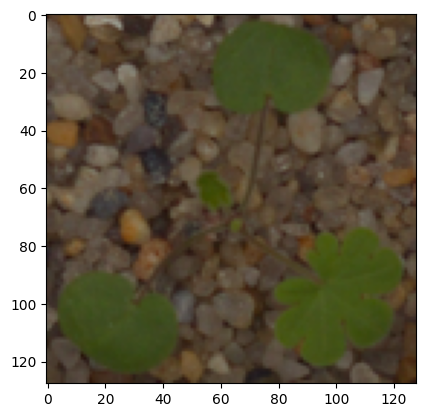

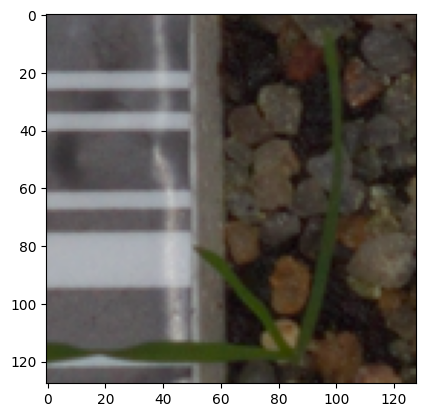

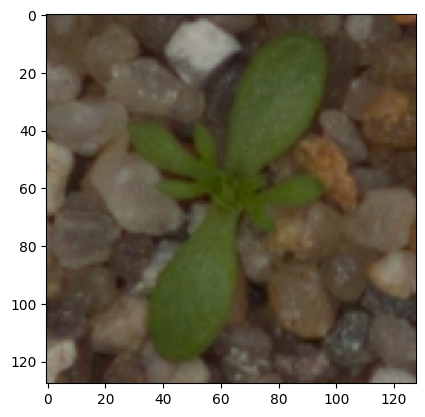

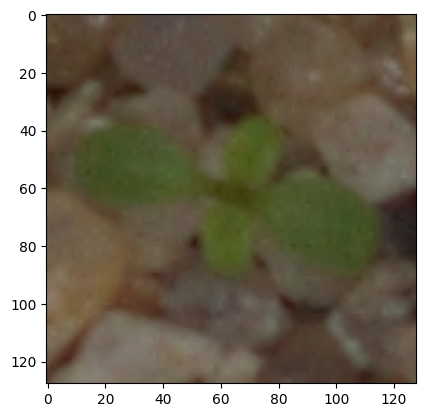

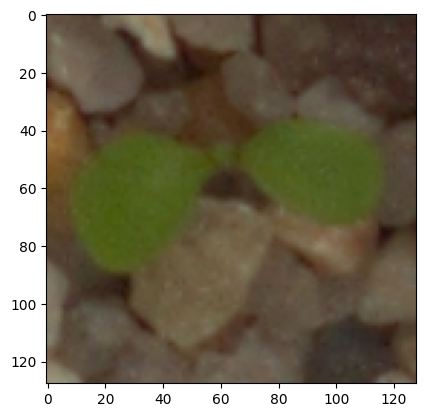

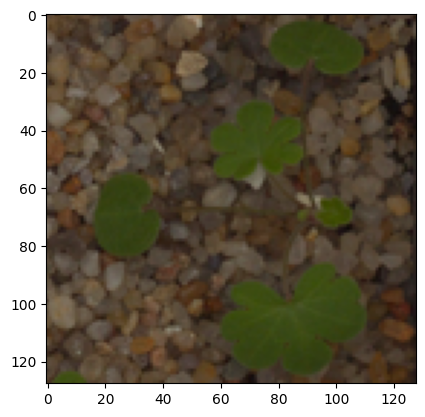

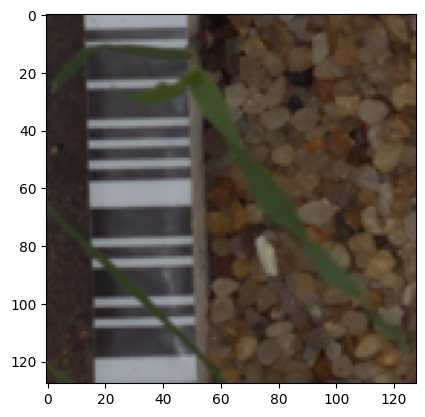

In [6]:
for iter_, (image, label) in enumerate(zip(X, y)):
    plt.imshow(image)
    plt.show()
    if iter_ > 5:
        break

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape) 

(3877, 128, 128, 3)
(1662, 128, 128, 3)
(1662,)


In [41]:
unique_values, counts = np.unique(y_train, return_counts=True)
baseline = 533/counts.sum()
print(baseline)


0.1374774310033531


In [10]:
def initialize_model():

    model = models.Sequential()
    
    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, (4,4), input_shape = (128,128,3), activation = 'relu', padding = 'same'))
    model.add(layers.MaxPool2D(pool_size = (2,2)))
    
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16,(3,3), activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size = (2,2)))

    ### Third Convolution & MaxPooling
    

    
    
    ### Flattening
    model.add(layers.Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation = 'relu'))
    
    ### Last layer 
    model.add(layers.Dense(12, activation = 'softmax'))
    
    ### Model compilation
    model.compile(optimizer = 'adam', metrics = ['accuracy'], loss ='categorical_crossentropy')
    
    return model

In [11]:
model = initialize_model()

model.summary()

/Users/teresehelen/.pyenv/versions/3.10.6/envs/ai_weeder/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 8)    │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15376)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       153,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,462 (607.27 KB)

 Trainable params: 155,462 (607.27 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train_cat,
                    validation_split=0.3,
                    batch_size=16,
                    epochs=70,
                    callbacks=[es])

Epoch 1/70
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.1029 - loss: 2.4852 - val_accuracy: 0.1409 - val_loss: 2.4652
Epoch 2/70
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1469 - loss: 2.4553 - val_accuracy: 0.2216 - val_loss: 2.4068
Epoch 3/70
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2203 - loss: 2.3567 - val_accuracy: 0.2466 - val_loss: 2.2856
Epoch 4/70
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2513 - loss: 2.2478 - val_accuracy: 0.2491 - val_loss: 2.2326
Epoch 5/70
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2662 - loss: 2.1835 - val_accuracy: 0.2577 - val_loss: 2.1865
Epoch 6/70
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2645 - loss: 2.1501 - val_accuracy: 0.2826 - val_loss: 2.1415
Epoch 7/70
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2778 - loss: 2.1005 - val_accuracy: 0.2612 - val_loss: 2.1304
Epoch 8/70
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3050 - loss: 2.0671 - val_accu

In [14]:
model.evaluate(X_test, y_test_cat)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3344 - loss: 1.9755


[1.966769814491272, 0.3297232389450073]

In [15]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS --- 

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    ax[0].set_ylim((0,3))

    ax[0].legend(['Train', 'val'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'val'], loc='best')

    ax[1].set_ylim((0,1))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title)

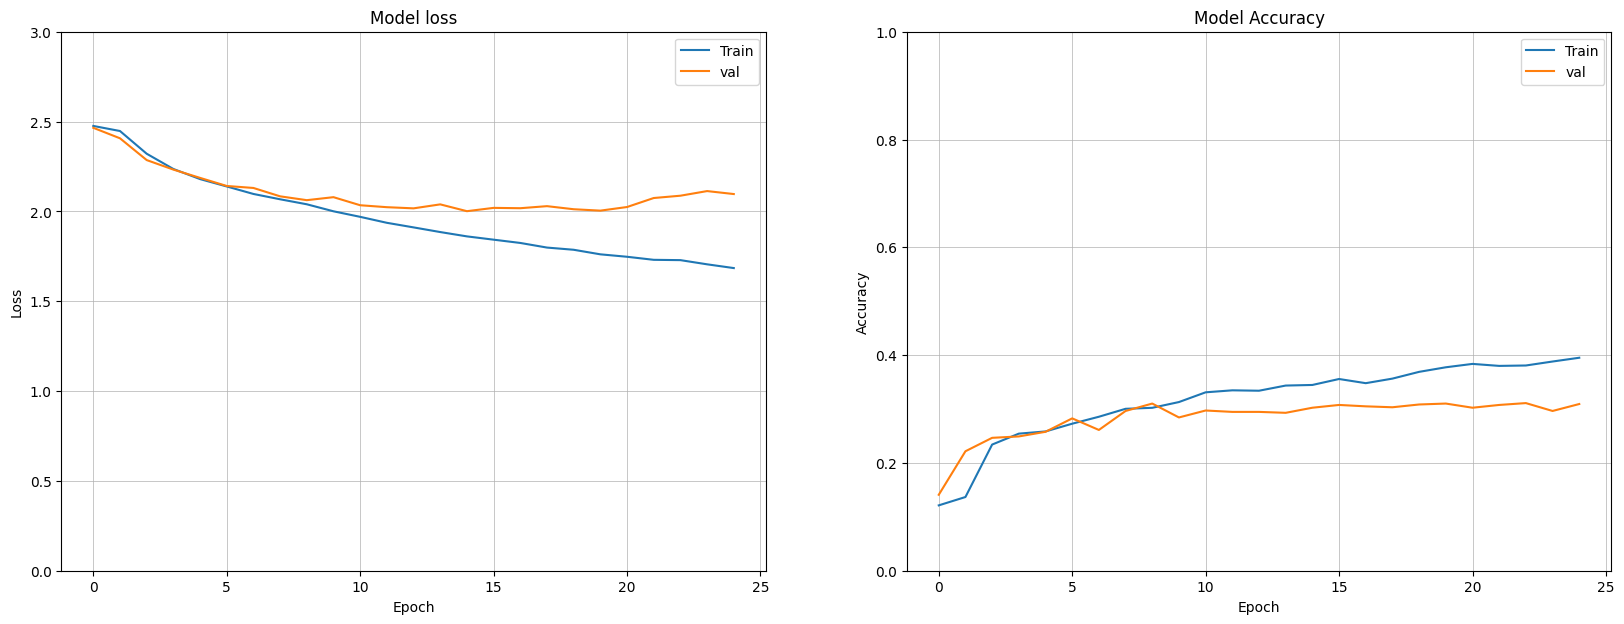

In [16]:
plot_loss_accuracy(history)

In [ ]:
#balanced
#F1 
#prevent overftittning

In [ ]:
#weed not weed
#augmention
#adding more layers
#moving kaggel 
#making the data a bit more balanced 